## DUCHEMIN QUENTIN

## DEEP LEARNING MVA :  HOMEWORK 1

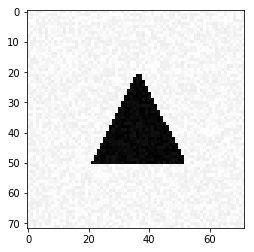

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras import utils

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]




### Simple Classification

In [2]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [3]:
# First MODEL : stochastic gradient descent optimizer
n,p = np.shape(X_train)
model = Sequential()
model.add(Dense(3, input_dim=p))
model.add(Activation('softmax'))
model.compile(optimizer=optimizers.SGD(lr=0.004),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, utils.to_categorical(Y_train), epochs=100)

Using TensorFlow backend.
c:\users\qduch\anaconda\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.24) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Epoch 1/100
300/300 [==============================] - 3s 12ms/step - loss: 2.4270 - acc: 0.4733
Epoch 2/100
300/300 [==============================] - 0s 104us/step - loss: 2.5555 - acc: 0.3833
Epoch 3/100
300/300 [==============================] - 0s 156us/step - loss: 2.0137 - acc: 0.4767
Epoch 4/100
300/300 [==============================] - 0s 156us/step - loss: 2.5266 - acc: 0.4533
Epoch 5/100
300/300 [==============================] - 0s 156us/step - loss: 1.8741 - acc: 0.5167
Epoch 6/100
300/300 [==============================] - 0s 104us/step - loss: 2.1752 - acc: 0.5033
Epoch 7/100
300/300 [==============================] - 0s 156us/step - loss: 1.8098 - acc: 0.5500
Epoch 8/100
300/300 [==============================] - 0s 156us/step - loss: 1.3642 - acc: 0.6367
Epoch 9/100
300/300 [==============================] - 0s 156us/step - loss: 0.8222 - acc: 0.7333
Epoch 10/100
300/300 [==============================] - 0s 156us/step - loss: 1.6557 - acc: 0.6300
Epoch 11/100
300/300

300/300 [==============================] - 0s 104us/step - loss: 0.0777 - acc: 0.9867
Epoch 84/100
300/300 [==============================] - 0s 156us/step - loss: 0.0650 - acc: 0.9900
Epoch 85/100
300/300 [==============================] - 0s 104us/step - loss: 0.0637 - acc: 1.0000
Epoch 86/100
300/300 [==============================] - 0s 104us/step - loss: 0.0811 - acc: 0.9733
Epoch 87/100
300/300 [==============================] - 0s 104us/step - loss: 0.0691 - acc: 0.9867
Epoch 88/100
300/300 [==============================] - 0s 156us/step - loss: 0.0688 - acc: 0.9900
Epoch 89/100
300/300 [==============================] - 0s 104us/step - loss: 0.0666 - acc: 0.9900
Epoch 90/100
300/300 [==============================] - 0s 156us/step - loss: 0.0639 - acc: 0.9967
Epoch 91/100
300/300 [==============================] - 0s 104us/step - loss: 0.0579 - acc: 0.9933
Epoch 92/100
300/300 [==============================] - 0s 104us/step - loss: 0.0581 - acc: 1.0000
Epoch 93/100
300/300 [=

##### Remark
We have chosen the categorical cross-entropy for the objective function. In fact, this is the default choice in Keras in association with the softmax activation.


##### Test of our results

The labels have been defined in the code provided for this project by :
- Rectangle : 0
- Disk : 1
- Triangle : 2

Let's test our algorithm with one instance of each category.

In [5]:
def category(vect):
    n = np.size(vect)
    i =0
    while vect[i]!=1:
        i += 1
    return "Predicted category : "+str(i)

In [6]:
def test_rectangle(model):
    print('Test for the Rectangle : Category 0 should be observed.')
    X_test = generate_a_rectangle()
    n_test = np.shape(X_test)[0]
    X_test = X_test.reshape(1,n_test)
    return category(model.predict(X_test)[0])
test_rectangle(model)

Test for the Rectangle : Category 0 should be observed.


'Predicted category : 0'

In [7]:
def test_disk(model):
    print('Test for the Disk : Category 1 should be observed.')
    X_test = generate_a_disk()
    n_test = np.shape(X_test)[0]
    X_test = X_test.reshape(1,n_test)
    return category(model.predict(X_test)[0])
test_disk(model)

Test for the Disk : Category 1 should be observed.


'Predicted category : 1'

In [8]:
def test_triangle(model):
    print('Test for the Triangle : Category 2 should be observed.')
    X_test , _ = np.array(generate_a_triangle())
    n_test = np.shape(X_test)[0]
    X_test = X_test.reshape(1,n_test)
    return category(model.predict(X_test)[0])
test_triangle(model)

Test for the Triangle : Category 2 should be observed.


'Predicted category : 2'

### Adam optimizer

Adam include the concept of momentum (a velocity component) in addition
to the acceleration component that SGD has. This allows faster convergence at the cost of
more computation.

In [10]:
model_adam = Sequential()
model_adam.add(Dense(3, input_dim=X_train.shape[1]))
model_adam.add(Activation('softmax'))
model_adam.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_adam.fit(X_train, utils.to_categorical(Y_train), epochs=40, validation_split=0.2, batch_size = 32)

Train on 240 samples, validate on 60 samples
Epoch 1/40
240/240 [==============================] - 0s 911us/step - loss: 2.7467 - acc: 0.3292 - val_loss: 1.5681 - val_acc: 0.3667
Epoch 2/40
240/240 [==============================] - 0s 195us/step - loss: 1.3801 - acc: 0.4708 - val_loss: 0.9327 - val_acc: 0.4167
Epoch 3/40
240/240 [==============================] - 0s 260us/step - loss: 0.8638 - acc: 0.5292 - val_loss: 0.9469 - val_acc: 0.5000
Epoch 4/40
240/240 [==============================] - 0s 260us/step - loss: 0.6147 - acc: 0.7125 - val_loss: 0.4817 - val_acc: 0.7833
Epoch 5/40
240/240 [==============================] - 0s 195us/step - loss: 0.4437 - acc: 0.8375 - val_loss: 0.4082 - val_acc: 0.8000
Epoch 6/40
240/240 [==============================] - 0s 130us/step - loss: 0.3792 - acc: 0.8333 - val_loss: 0.3513 - val_acc: 1.0000
Epoch 7/40
240/240 [==============================] - 0s 260us/step - loss: 0.3071 - acc: 0.9458 - val_loss: 0.3186 - val_acc: 0.9667
Epoch 8/40
240/24

In [11]:
test_rectangle(model_adam)

Test for the Rectangle : Category 0 should be observed.


'Predicted category : 0'

In [12]:
test_disk(model_adam)

Test for the Disk : Category 1 should be observed.


'Predicted category : 1'

In [13]:
test_triangle(model_adam)

Test for the Triangle : Category 2 should be observed.


'Predicted category : 2'

## Part 4 Visualization of the Solution

The Adam optimizer 

In [14]:
weights = model.get_weights()[0]

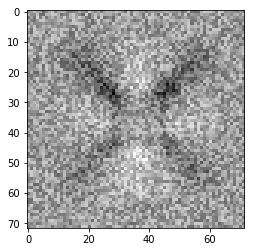

In [16]:
# VISUALIZATION COLUMN 0 

plt.imshow(weights[:,0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

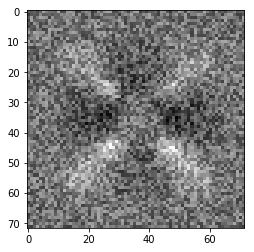

In [17]:
# VISUALIZATION COLUMN 1

plt.imshow(weights[:,1].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

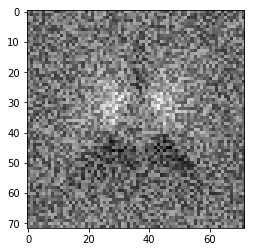

In [18]:
# VISUALIZATION COLUMN 2

plt.imshow(weights[:,2].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

The previous images allow us to understand that the different columns of the matrix of our classifier corresponds with the three categories. The first column shows that we recognize a rectangle by looking for corners, the second shows that we detect a circle when we do not find any corner (that's why the gray intensity of the first and the second images are opposite ie black is transformed in white and white is transformed in black). The third image points out that a triangle is detected when we find no filled pixels around the center of images (where we find white areas).


## Part 5 A More Difficult Classification Problem


In [20]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [32]:
# NEW training set
[X_train, Y_train] = generate_dataset_classification(3000, 20, True)

# Test set
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [22]:
# We use the same model with the same parameters
model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1]))
model.add(Activation('softmax'))
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, utils.to_categorical(Y_train), epochs=50, batch_size = 32)

Epoch 1/50
3000/3000 [==============================] - 1s 182us/step - loss: 1.0226 - acc: 0.5020
Epoch 2/50
3000/3000 [==============================] - 0s 99us/step - loss: 0.8938 - acc: 0.5693
Epoch 3/50
3000/3000 [==============================] - 0s 99us/step - loss: 1.0669 - acc: 0.5450
Epoch 4/50
3000/3000 [==============================] - 0s 104us/step - loss: 0.8643 - acc: 0.5907
Epoch 5/50
3000/3000 [==============================] - 0s 109us/step - loss: 0.8338 - acc: 0.5890
Epoch 6/50
3000/3000 [==============================] - 0s 141us/step - loss: 0.7817 - acc: 0.6060
Epoch 7/50
3000/3000 [==============================] - 0s 151us/step - loss: 0.7928 - acc: 0.6140
Epoch 8/50
3000/3000 [==============================] - 0s 141us/step - loss: 0.8247 - acc: 0.6073
Epoch 9/50
3000/3000 [==============================] - 0s 115us/step - loss: 0.8684 - acc: 0.5943
Epoch 10/50
3000/3000 [==============================] - 0s 109us/step - loss: 0.7419 - acc: 0.6237
Epoch 11/50

In [34]:
[loss,accuracy]=model.evaluate(X_test, Y_test)
print('LOSS :',loss)
print('ACCURACY',accuracy)

300/300 [==============================] - 0s 104us/step
LOSS : 0.7428324921925863
ACCURACY 0.5933333325386048


### Convolutional "deep" network


In [35]:
# Dimension manipulation
X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)

We follow the advices regarding the parameters given in the homework sheet.

In [36]:
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, utils.to_categorical(Y_train), epochs=10, batch_size=32)

Epoch 1/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.9345 - acc: 0.6003
Epoch 2/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.6349 - acc: 0.7630
Epoch 3/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.5242 - acc: 0.8097
Epoch 4/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.4578 - acc: 0.8450
Epoch 5/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.3940 - acc: 0.8707
Epoch 6/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3421 - acc: 0.8947
Epoch 7/10
3000/3000 [==============================] - 12s 4ms/step - loss: 0.2982 - acc: 0.9127
Epoch 8/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2494 - acc: 0.9277
Epoch 9/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.2375 - acc: 0.9287
Epoch 10/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1934 - acc: 0.9500


In [37]:
[loss,accuracy]=model.evaluate(X_test, Y_test)
print('LOSS :',loss)
print('ACCURACY',accuracy)

300/300 [==============================] - 1s 2ms/step
LOSS : 0.27717390696207683
ACCURACY 0.9100000007947286


### Comments on the results


The first model applied for this problem is not performing really well. Indeed, we suffer a loss aroung 0.8 and an accuracy of barely 0.6 which is not satisfying. The neural network model is too simple to be able to reach decent results. Moreover, we can highlight the fact that the model is overfitting because the accuracy on the training data is 0.68 and on the test is only 0.58. 

Nevertheless, the CNN built is performing quite well ! This can be easily understood because Convolutional neural networks leverage spatial information and are therefore very well suited for classifying images.

## Part 6 A Regression Problem

In [135]:
# Training set
[X_train, Y_train] = generate_dataset_regression(300, 20)
# Test set
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [136]:
# Dimension manipulation
X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)

In [138]:
def classify(Y):
    
    Y = Y.reshape((-1, 3, 2))
    save_Y = np.zeros((np.shape(Y)))
    
    for i, pts in enumerate(Y):
        lis = list(pts)
        lis.sort(key=lambda x: x[0])
        
        lis = [lis[0], lis[2], lis[1]]
        
        save_Y[i, :, :] = lis
        
    # Reshape Y
    save_Y = save_Y.reshape((-1, 6))
    
    return save_Y

# Renormalisation of the vertices
Y_train = classify(Y_train)
Y_test = classify(Y_test)

In [139]:
model = Sequential([
    BatchNormalization(),
    Conv2D(8, 3, activation='relu', padding="same", input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    Conv2D(8, 3, activation='relu', padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(16, 3, activation='relu', padding="same"),
    Conv2D(16, 3, activation='relu', padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(32, 3, activation='relu', padding="same"),
    Conv2D(32, 3, activation='relu', padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(6, activation="relu")
])

# Compiler of the model
model.compile(loss='mean_squared_error', optimizer="adam", metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=25, batch_size=32, verbose=1)

Epoch 1/25
300/300 [==============================] - 4s 15ms/step - loss: 0.1313 - acc: 0.4400
Epoch 2/25
300/300 [==============================] - 3s 11ms/step - loss: 0.0607 - acc: 0.5267
Epoch 3/25
300/300 [==============================] - 3s 10ms/step - loss: 0.0426 - acc: 0.5600
Epoch 4/25
300/300 [==============================] - 3s 11ms/step - loss: 0.0343 - acc: 0.5633
Epoch 5/25
300/300 [==============================] - 4s 12ms/step - loss: 0.0311 - acc: 0.5833
Epoch 6/25
300/300 [==============================] - 3s 11ms/step - loss: 0.0286 - acc: 0.5900
Epoch 7/25
300/300 [==============================] - 3s 9ms/step - loss: 0.0266 - acc: 0.5967
Epoch 8/25
300/300 [==============================] - 3s 9ms/step - loss: 0.0253 - acc: 0.6100
Epoch 9/25
300/300 [==============================] - 3s 9ms/step - loss: 0.0237 - acc: 0.6433
Epoch 10/25
300/300 [==============================] - 3s 9ms/step - loss: 0.0222 - acc: 0.6333
Epoch 11/25
300/300 [======================

#### Test of our model on Test dataset

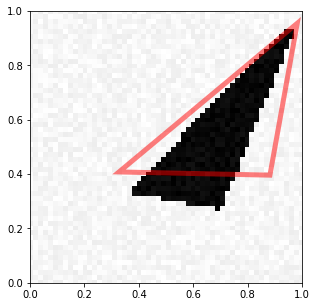

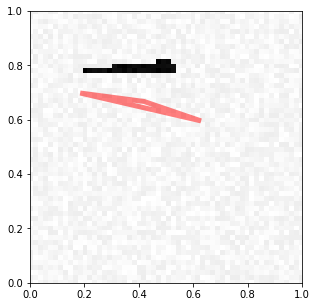

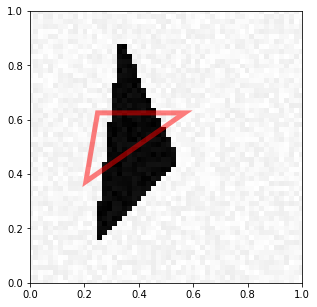

In [140]:
Y = model.predict(X_test)
visualize_prediction(X_test[0], Y[0])
visualize_prediction(X_test[1], Y[1])
visualize_prediction(X_test[2], Y[2])

#### Test of our model on Test dataset

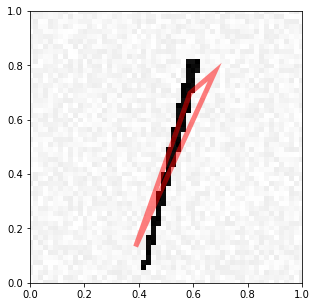

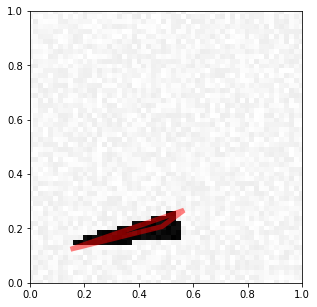

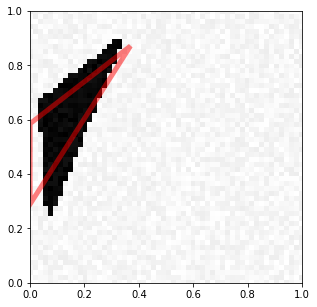

In [141]:
Y2 = model.predict(X_train)
visualize_prediction(X_train[0], Y2[0])
visualize_prediction(X_train[1], Y2[1])
visualize_prediction(X_train[2], Y2[2])

In [142]:
[loss,accuracy]=model.evaluate(X_test, Y_test)
print('LOSS :',loss)
print('ACCURACY',accuracy)

300/300 [==============================] - 2s 5ms/step
LOSS : 0.021280272205670674
ACCURACY 0.7166666658719381


In order to learn our network, we need first to order the corner of the triangle in the "same" order. Our prediction is not completely satisfying but catch the main shape of the initial figure.

## 7 Image Denoising

In [123]:
def generate_a_pair(free_location=True):
    """Modification of the generate_a_* functions to generate pairs of images,
    where one image has noise with random amplitude, and the second image has the
    same content but without the noise"""
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.2 + np.random.random())
        top = 1./2 + side/2
        bottom = 1./2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return np.array([generate_a_drawing(1., U, V, 500.), generate_a_drawing(1., U, V, 0.0)])

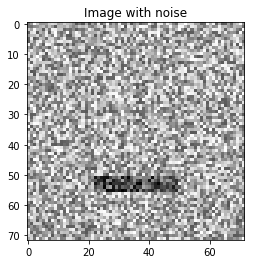

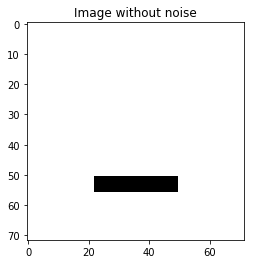

In [124]:
img_noise, img = generate_a_pair()
plt.imshow(img_noise.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title('Image with noise')
plt.show()
plt.imshow(img.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.title('Image without noise')
plt.show()

In [125]:
Xtrain = np.array([generate_a_pair() for i in range(400)])
Xtest = np.array([generate_a_pair() for i in range(40)])
X_train = Xtrain[:,0,:]
Y_train = Xtrain[:,1,:]

X_test = Xtest[:,0,:]
Y_test = Xtest[:,1,:]

X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)

Y_train = Y_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)
Y_test = Y_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1)

In [126]:
from keras.layers import Conv2DTranspose
from keras.layers import UpSampling2D

model = Sequential()
model.add(Conv2D(16, (4, 4), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (4, 4), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2DTranspose(10, (5, 5), activation = "relu", padding = 'same'))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2DTranspose(10, (5, 5), activation = "relu", padding = 'same'))
model.add(Dense(1))
model.compile(optimizer="adam",
              loss='mse')

model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split = 0.1)

Train on 360 samples, validate on 40 samples
Epoch 1/100
360/360 [==============================] - 9s 26ms/step - loss: 20015.5976 - val_loss: 6092.6932
Epoch 2/100
360/360 [==============================] - 8s 22ms/step - loss: 4909.4280 - val_loss: 3421.0869
Epoch 3/100
360/360 [==============================] - 11s 31ms/step - loss: 3436.0397 - val_loss: 2820.1914
Epoch 4/100
360/360 [==============================] - 9s 26ms/step - loss: 2758.8718 - val_loss: 2455.2697
Epoch 5/100
360/360 [==============================] - 9s 25ms/step - loss: 2383.7452 - val_loss: 2119.0543
Epoch 6/100
360/360 [==============================] - 8s 22ms/step - loss: 2086.1478 - val_loss: 1914.5249
Epoch 7/100
360/360 [==============================] - 8s 22ms/step - loss: 1899.8569 - val_loss: 1778.7193
Epoch 8/100
360/360 [==============================] - 9s 24ms/step - loss: 1767.6018 - val_loss: 1679.0301
Epoch 9/100
360/360 [==============================] - 9s 24ms/step - loss: 1665.4316 - v

Epoch 77/100
360/360 [==============================] - 10s 28ms/step - loss: 254.8943 - val_loss: 300.2961
Epoch 78/100
360/360 [==============================] - 9s 24ms/step - loss: 257.0700 - val_loss: 281.8443
Epoch 79/100
360/360 [==============================] - 8s 23ms/step - loss: 253.9006 - val_loss: 299.5561
Epoch 80/100
360/360 [==============================] - 9s 24ms/step - loss: 255.1534 - val_loss: 297.4415
Epoch 81/100
360/360 [==============================] - 11s 30ms/step - loss: 255.9065 - val_loss: 290.8670
Epoch 82/100
360/360 [==============================] - 11s 31ms/step - loss: 252.5907 - val_loss: 289.6591
Epoch 83/100
360/360 [==============================] - 11s 30ms/step - loss: 259.1407 - val_loss: 281.7072
Epoch 84/100
360/360 [==============================] - 10s 28ms/step - loss: 247.3009 - val_loss: 277.4083
Epoch 85/100
360/360 [==============================] - 10s 29ms/step - loss: 245.2675 - val_loss: 277.9109
Epoch 86/100
360/360 [=========

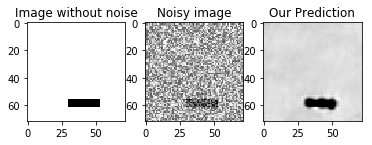

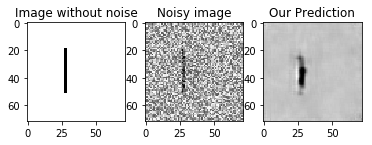

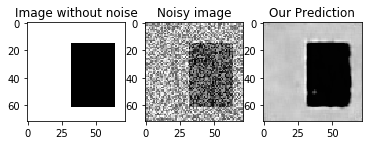

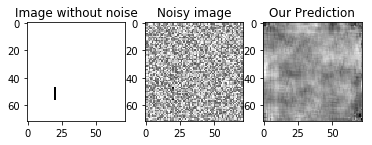

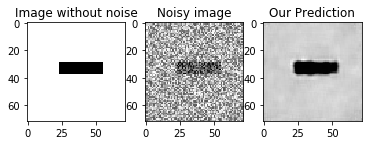

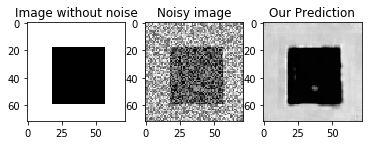

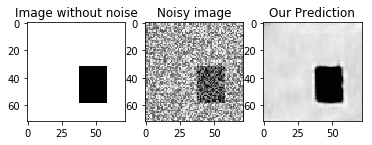

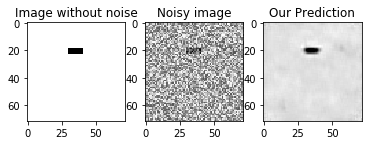

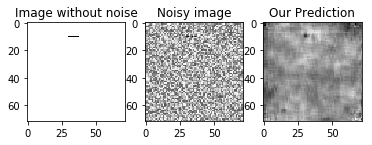

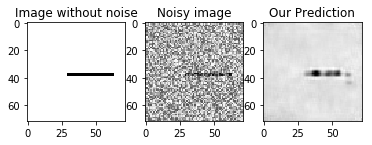

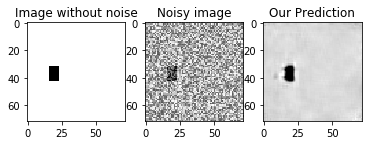

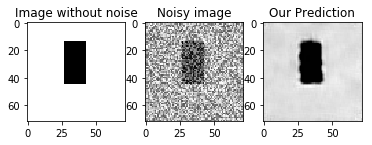

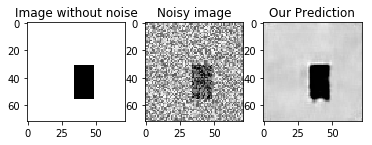

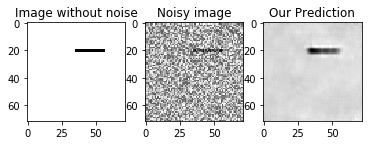

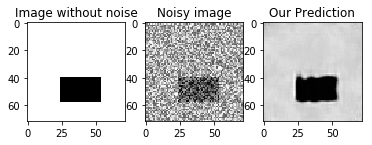

In [127]:
for i in range(15):
    plt.subplot(1, 3, 1)
    plt.imshow(Y_test[i,:,:,0], cmap='gray')
    plt.title("Image without noise")
    plt.subplot(1, 3, 2)
    plt.imshow(X_test[i,:,:,0], cmap='gray')
    plt.title('Noisy image')
    plt.subplot(1, 3, 3)
    plt.imshow(model.predict(X_test)[i,:,:,0], cmap='gray', label = "predicted")
    plt.title('Our Prediction')
    plt.show()

We are able to recover the main shape of the original rectangle of the image. We can remark that some kind of rectangle with a ratio length/width far away from one are harder to recover.

Finally, this model was motivated by the inspired by the U_net model.